
# Twitter 2016 Election

## Analysis and Results  
-[Load the dataset of previously downloaded tweets](#Load-the-dataset-of-previously-downloaded-tweets)   
-[Explore the data](#Explore-the-data)
 - [Table plots to check for missing data](#Table-plots-to-check-for-missing-data)   
 - [Re-tweeted messages are often favorited](#Re--tweeted-messages-are-often-favorited)  
 - [Density plots of total tweets vs. day showing modest temporal variation](#Density-plots-of-total-tweets-vs.-day-showing-modest-temporal-variation)    
 - [Unpopular re-tweets are responsive to events and the morning/evening cycle](#Unpopular-re-tweets-are-responsive-to-events-and-the-morning/evening-cycle)
 - [More Trump tweets than Clinton tweets overall](#More-Trump-tweets-than-Clinton-tweets-overall)  
 - [Clinton tweets outnumber Trump tweets from Oct. 9th through Oct. 16th](#Clinton-tweets-outnumber-Trump-tweets-from-Oct.-9th-through-Oct.-16th)  

-[Next steps](#Next-steps)   


In [3]:
# Clear all variables and devices
rm(list=ls())
invisible(dev.off())

#### Descriptions of packages to be used

  **ply/dplyr**: break tasks into smaller manageable pieces and put them
   together; data manipulation functions esp. for data frames  
  **stringr**: Powerful R's String functions   
  **lubridate**: Make dealing with dates easier  
  **tm**:      Text Mining Framework  
  **wordcloud**: build wordcloud  
  **RColorBrewer**: Palettes for sketching elegant maps  
  **lattice**: building plots / environment ( 2)  
  **ggplot2**: building plots / environment ( 3)  
  **gmodels**: includes tools for model fitting (CrossTable)  
  **scales**:  scaling of dataset  
  **network**: represent relational data types as network objects  
  **sna**:     graphing social network analysis  
  **qdap**:    quantitative analysis of data  
  **cowplot**: combining two or more plots  
  **Amelia**:  Imputation of missing data (used in missingness map)  
  **mlbench**: machine learning benchmarking  
  **corrplot**:building correlation plots  
  **tabplot**: building tableplot to view summary of entire dataset  
  **sm**:      compare the densities of two groups  


In [4]:
#  Load the required packages (if packages are not available, 
#  then install them first)

for (package in c('plyr', 'dplyr', 'stringr', 'lubridate',
                  'tm', 'wordcloud', 'RColorBrewer',
                  'lattice', 'ggplot2','gmodels', 'scales',
                  'network', 'sna', 'qdap', 'cowplot',
                  'Amelia', 'mlbench', 'corrplot', 'tabplot', 'sm')) {
  if (!require(package, character.only=T, quietly=T)) { 
    invisible(install.packages(package))
    library(package, character.only=T)
  }
}
# Confirm that all packages got loaded
length(search())  # 39 items


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘lubridate’

The following object is masked from ‘package:plyr’:

    here

The following object is masked from ‘package:base’:

    date


Attaching package: ‘ggplot2’

The following object is masked from ‘package:NLP’:

    annotate

network: Classes for Relational Data
Version 1.13.0 created on 2015-08-31.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Martina Morris, University of Washington
                    Skye Bender-deMoll, University of Washington
 F

[1] 39

## Load the dataset of previously downloaded tweets
It currently contains tweets from October 1st through October 16th.

In [5]:
#  Declare Local Variables for Twitter data
file.path <- "/Users/cynthiacorrea/TwitterProject/" 
#     load(file=paste0(file.path, "ModifiedTweets.Rda"))
load(file="/Users/cynthiacorrea/TwitterProject/ModifiedTweets.Rda")

## Explore the data

We chose original tweets (as opposed to re-tweets) from within the US, containing "Donald Trump" and/or "Hillary Clinton" starting Oct. 1st. The dataset presented here goes until Oct. 17. 

In [6]:
# library(tabplot)
# Convert some entries to factor type
tweets.tab <- combined.tweets
tweets.tab$search.str <- as.factor(tweets.tab$search.str)
tweets.tab$replyToSN <- as.factor(tweets.tab$replyToSN)
tweets.tab$replyToSID <- as.factor(tweets.tab$replyToSID)
tweets.tab$id <- as.factor(tweets.tab$id)
tweets.tab$replyToUID <- as.factor(tweets.tab$replyToUID)
tweets.tab$statusSource <- as.factor(tweets.tab$statusSource)
tweets.tab$screenName <- as.factor(tweets.tab$screenName)


# Validate the structure of the newly created data frame
str(tweets.tab)
# 'data.frame':	58132 obs. of  20 variables:
# $ search.str   : Factor w/ 2 levels "Donald Trump",..: 1 1 1 1 1 1 1 1 1 1 ...
# $ text         : chr  "@Cernovich admits Trump is rapist.  #MANYPEOPLEARESAYING  
#    https://t.co/6hSAUwYnGc" "@HillaryClinton \n\nWhat a nice guy.\nhttps://t.co/GU49D7Wweo" 
#    "Trump promises he won't say it, then he does @CNNPolitics https://t.co/34Pn3JR76q" 
#    "I don't want Donald Trump to win but at the same time I don't want Hilary to win either" ...
# $ favorited    : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...

'data.frame':	58132 obs. of  20 variables:
 $ search.str   : Factor w/ 2 levels "Donald Trump",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ text         : chr  "@Cernovich admits Trump is rapist.  #MANYPEOPLEARESAYING  https://t.co/6hSAUwYnGc" "@HillaryClinton \n\nWhat a nice guy.\nhttps://t.co/GU49D7Wweo" "Trump promises he won't say it, then he does @CNNPolitics https://t.co/34Pn3JR76q" "I don't want Donald Trump to win but at the same time I don't want Hilary to win either" ...
 $ favorited    : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ favoriteCount: num  0 0 0 23 0 0 1 0 0 0 ...
 $ replyToSN    : Factor w/ 3733 levels "__Dyer__","_AIexx",..: 568 1401 NA NA NA NA NA NA NA NA ...
 $ created      : POSIXct, format: "2016-10-01 23:59:52" "2016-10-01 23:59:51" ...
 $ truncated    : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ replyToSID   : Factor w/ 4581 levels "509869045324460032",..: 144 302 NA NA NA NA NA NA NA NA ...
 $ id           : Factor w/ 58132 levels "782347746254659584",..: 3

### Table plots to check for missing data  

Creating 4 tableplots to ascertain the integrity of the data. 

#### Fields
**search.str**: "Donal Trump" or "Hillary Clinton"  
**text**: The text of the status  
**screenName**: Screen name of the user who posted this status  
**id**: ID of this status  
**replyToSN**: Screen name of the user this is in reply to  
**replyToSID**: ID of the user this is in reply to  
**replyToUID**: ID of the user this was in reply to  
**statusSource**: Source user agent for this tweet  
**created**: When this status was created, same as **timestamp**
**truncated**: Whether this status was truncated  
**favorited**: Whether this status has been favorited  
**retweeted**: TRUE if this status has been retweeted  
**retweetCount**: The number of times this status has been retweeted  
**latitude**: A numerical latitude value, between -180 and 180 inclusive. West is negative,
East is positive  
**longitude**: A numerical longitude value, between -180 and 180 inclusive. South is negative,
North is positive  

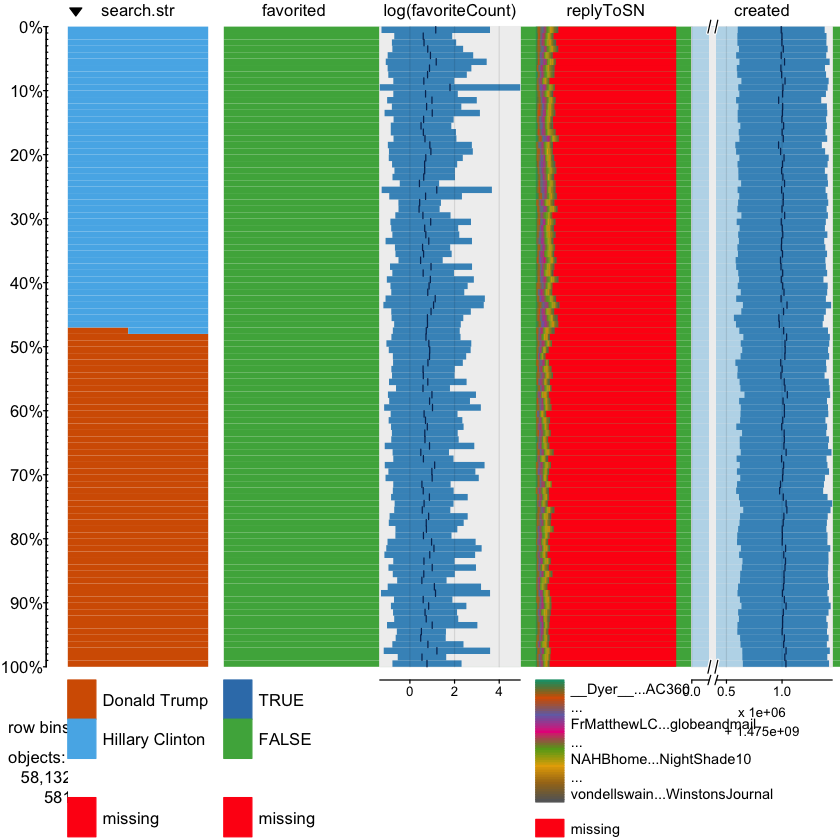

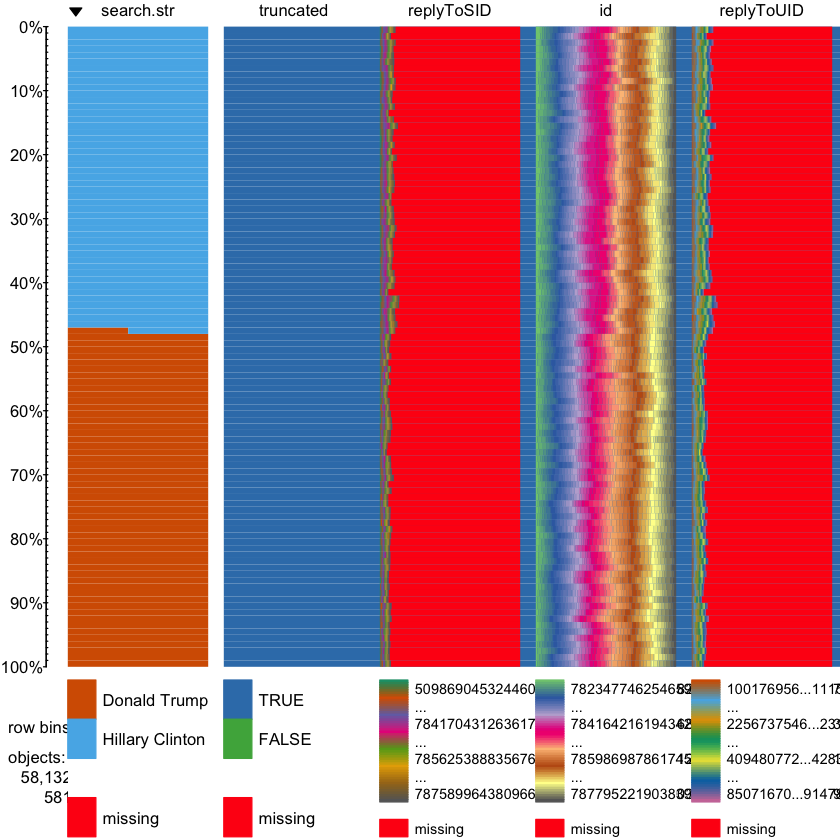

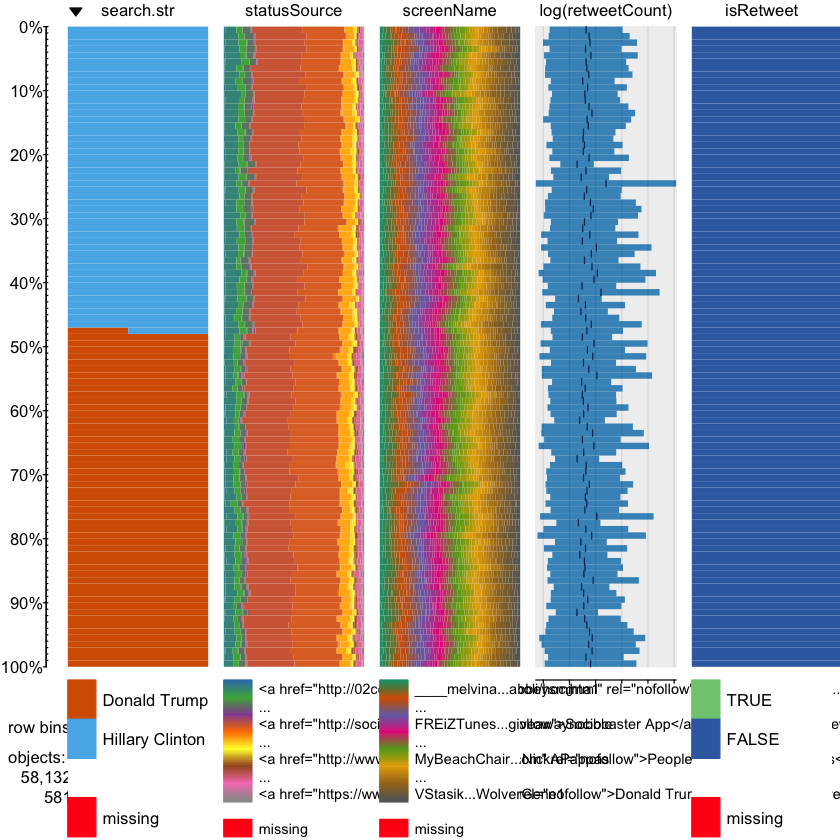

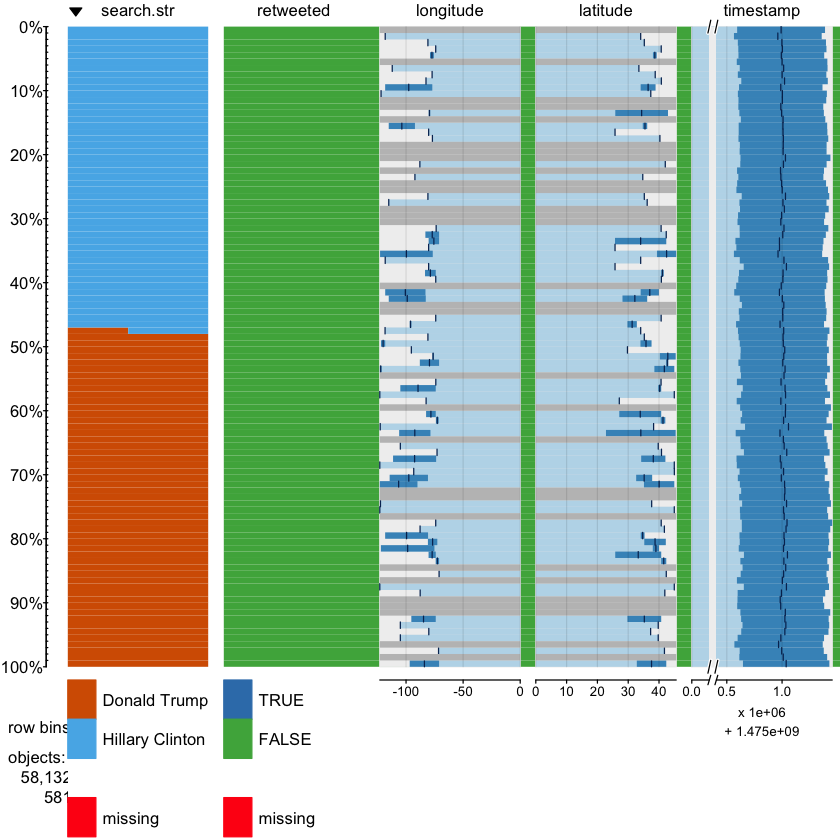

In [7]:
invisible(dev.off())
quartz()
tableplot(tweets.tab[, c(1,3:6)])

invisible(dev.off())
quartz()
tableplot(tweets.tab[, c(1,7:10)])

invisible(dev.off())
quartz()
tableplot(tweets.tab[, c(1,11:14)])

invisible(dev.off())
quartz()
tableplot(tweets.tab[, c(1,15:18)])
invisible(dev.off())

In [8]:
# library(Amelia)
# library(mlbench)

# chart reduced to 500 records for clarity purposes
# checking for missing data check
invisible(dev.off())
missmap(combined.tweets[1:500,], col=c("red", "green"), legend=TRUE)


# How many records do we have with no latitude/longitude info?
nrow(filter(combined.tweets[, -19], 
            (is.na(latitude) | is.na(longitude))))
# [1] 58028  # 58028 out of 58132 records have blank lat/long (99.8%)

[1] 58028

### Re-tweeted messages are often favorited 
  
Check for and calculate correlation among the numeric fields.

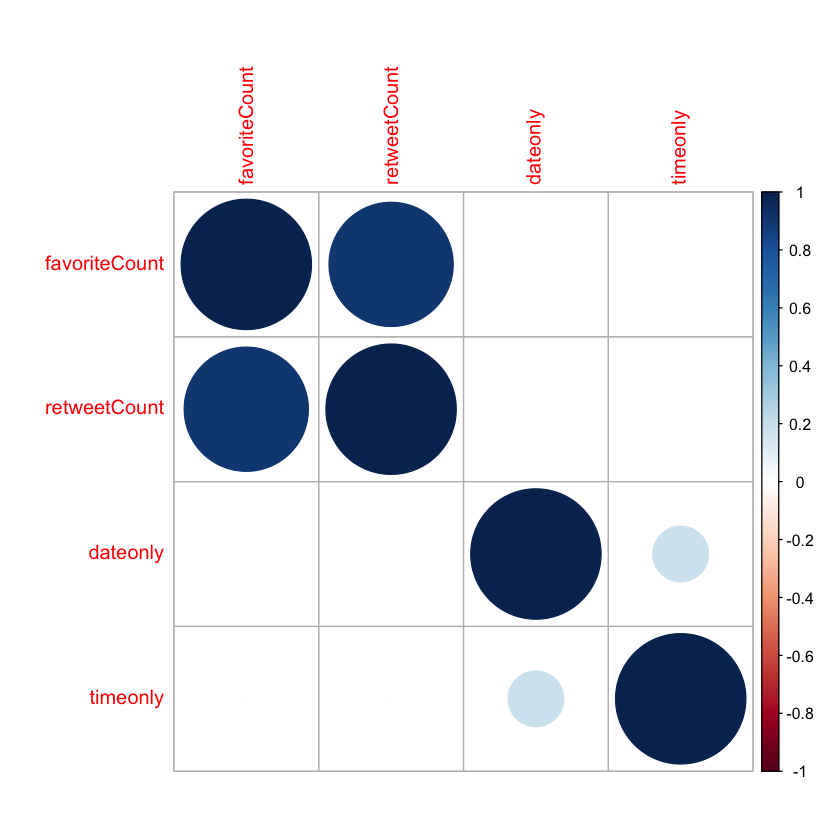

In [9]:
# library(corrplot)
#
# The fields chosen for the correlation analysis are:
#     favoriteCount, retweetCount, dateonly, and timeonly
# create a temporary data frame with the above 4 columns of the main tweets
# data frame. The dateonly field should contain only day (numeric) part of
# the date/data.
tweets.cor.tmp <- combined.tweets[, c(4, 13, 19, 20)]
tweets.cor.tmp$dateonly <- day(tweets.cor.tmp$dateonly)

tweets.cor <- cor(tweets.cor.tmp)


# create correlation plot
invisible(dev.off())
quartz()
corrplot(tweets.cor, method="circle")

The resulting plot indicates favoriteCount and retweetCount to be highly correlated positively. It may be due to many tweets having zero for both fields. Let's filter out the tweets with zero retweetCount and zero favoriteCount and see if the two fields are still highly correlated.

Highly correlated factors increase the standard error of estimates of the regression coefficients.

Additional dangers are listed on the wikipedia page on multicollinearity. Here, it is pointed out that correlation between the factors can lead to overfitting, and if omitted variable bias is present, correlation between variables can magnify the problem. When a lot of extrapolation is performed, this can lead to large prediction errors.

In [10]:
# How many records do we have with both favoriteCount and
# retweetCount as 0 (zeroes)
print('Number of records favorited and retweeted zero times:')
nrow(filter(combined.tweets[, -19], 
            (favoriteCount == 0 & retweetCount == 0)))
# 38179   

print('Number of records favorited and retweeted once or more:')
nrow(filter(combined.tweets[, -19], 
            (favoriteCount > 0 & retweetCount > 0)))
# 10487

[1] "Number of records favorited and retweeted zero times:"


[1] 38179

[1] "Number of records favorited and retweeted once or more:"


[1] 10487

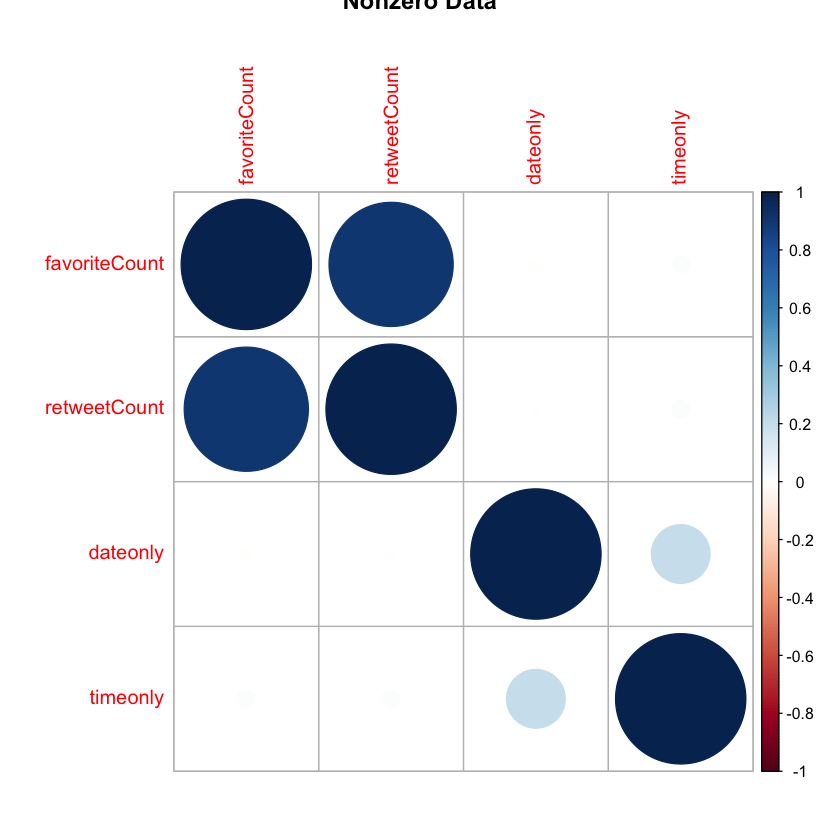

In [11]:
# Use filtered data set to create new correlation plot. Verify the
# correlation between the two counts.
tweets.cor <- cor((filter(tweets.cor.tmp, 
                          (favoriteCount > 0 & retweetCount > 0))))

invisible(dev.off())
quartz()
corrplot(tweets.cor, method="circle", main="Nonzero Data")

Since 25783 out 39572 records have both counts as zeroes, there is a  possibility that it could be the reason why they are showing up as highly correlated. Further validation of this aspect may be required. 

I checked if these two counts are still highly correlated even after filtering the records that have zeroes values for both. These counts are still highly correlated to each other, but both do not have any correlation with the recorded day and time of tweets. 
  
Conclusion: Tweets that are being favorited are also being retweeted proportionately

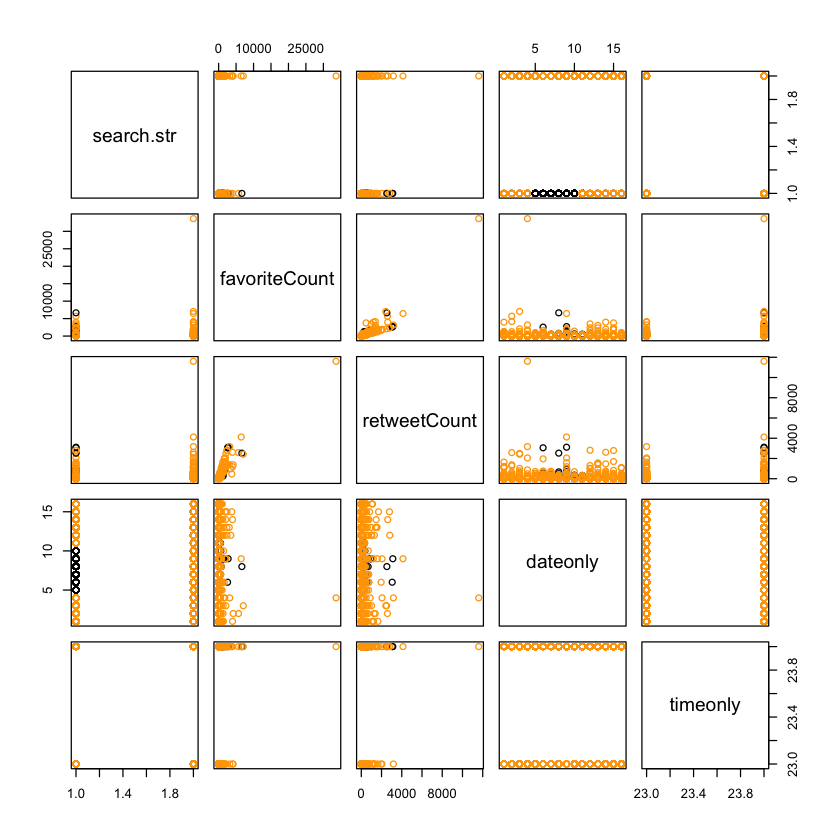

In [12]:
# Visualize the interaction of favoriteCount and retweetCount
# using the Scatterplots

tweets.cor.tmp <- combined.tweets[, c(1, 4, 13, 19, 20)]
tweets.cor.tmp$search.str <- as.factor(tweets.cor.tmp$search.str)
tweets.cor.tmp$dateonly <- as.numeric(day(tweets.cor.tmp$dateonly))

invisible(dev.off())
quartz()

cols <- character(nrow(tweets.cor.tmp))
cols[] <- "black"
cols[tweets.cor.tmp$search.str %in% c("Donald Trump")] <- "orange"
cols[tweets.cor.tmp$search.str %in% c("Hillary Clinton")] <- "blue"

pairs(search.str ~ ., 
      data=(filter(tweets.cor.tmp, 
                   (favoriteCount > 0 & retweetCount > 0))),
      col = cols)
#      col = tweets.cor.tmp$search.str)


search.str,favoriteCount,retweetCount
Hillary Clinton,33634,11603


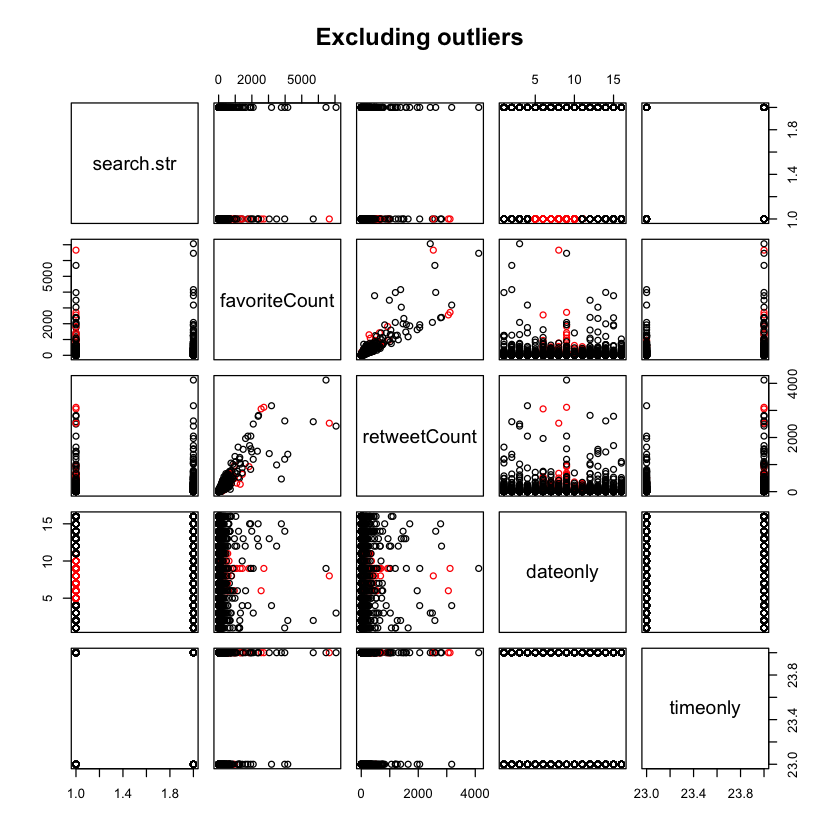

In [13]:
# Test this outlier data row from the main data frame
filter(combined.tweets[, c(1,4,13)], favoriteCount > 30000)

# Draw the Scatterplot again after filtering the outlier
invisible(dev.off())
quartz()

cols[] <- "black"
cols[tweets.cor.tmp$search.str %in% c("Donald Trump")] <- "orange"
cols[tweets.cor.tmp$search.str %in% c("Hillary Clinton")] <- "blue"
pairs(search.str ~ ., 
      data=(filter(tweets.cor.tmp[tweets.cor.tmp$favoriteCount<30000, ], 
                   (favoriteCount > 0 & retweetCount > 0))),
      col = cols, main='Excluding outliers')

### Density plots of total tweets vs. day showing modest temporal variation

Visualize the pattern of tweets (Density) i.e. pattern of favorited,  retweeted, or replied against the total tweets during each day. 

  Density is the measure of consistency and it may not be exactly  proportional to the number of tweets or number of retweets for each day. A density  chart focuses on and provides a visual of this measure of consistency across  different days. Histograms are not better because they depend on number of bins.
  
  We will look for trends during and before and after the second presidential debate, on October 9th, 2016, which aired from 9pm to 10:30pm ET (8pm – 9:30pm CT, 7pm – 8:30pm MT, 6pm – 7:30pm PT).

[1] "2016-10-14 22:42:47 UTC"

[1] "2016-10-14 23:59:57 UTC"

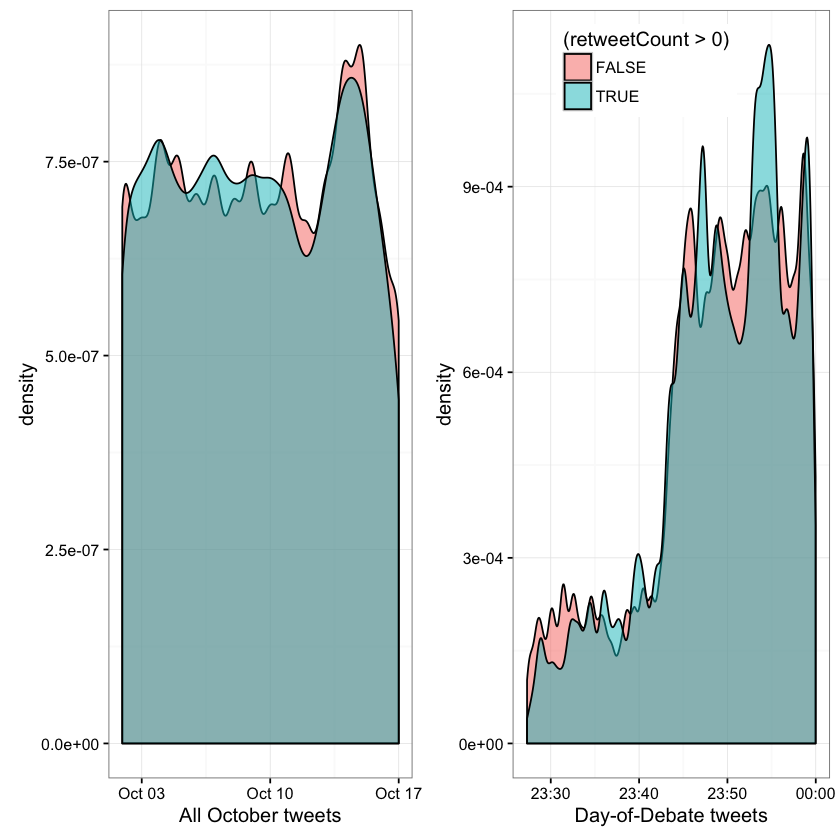

In [48]:
# First, set a ggplot2 theme to be used for the plots.

theme_set(new = theme_bw())  # The classic dark-on-light ggplot2 theme

# Plot for pattern of retweeted tweets 
invisible(dev.off())
quartz()
DateWisePlot = ggplot(combined.tweets, aes(created)) + 
  geom_density(aes(fill = (retweetCount > 0)), alpha = .5) +
  scale_fill_discrete(guide = 'none') +   # remove legend
  xlab('All October tweets')
#plot(DateWisePlot)

# Zoom on debate day
dayOfDebate = combined.tweets[mday(combined.tweets$created) == 9, -19]

DebateDayPlot = ggplot(dayOfDebate, aes(created)) + 
  geom_density(aes(fill = (retweetCount > 0)), adjust = .25, alpha = .5) +
  theme(legend.justification = c(1, 1), legend.position = c(0.75, 1)) +
  xlab('Day-of-Debate tweets')
#plot(timeDistDayOf)
cowplot::plot_grid(DateWisePlot, DebateDayPlot) # Fit both the plots

In [49]:
min(combined.tweets[mday(combined.tweets$created) == 9, 6])
max(combined.tweets[mday(combined.tweets$created) == 9, 6])

[1] "2016-10-09 23:27:19 UTC"

[1] "2016-10-09 23:59:59 UTC"

The big dip around Oct. 13 could be due to some other event that distracted people from the election. One such even could have been Hurricane Matthew, which hit FL and NC on the 12th, after having killed hundreds of people in Haiti.

The Oct. 4 peak is due to the vice-presidential debate that day. Notice that the re-tweeted messages tend to occur before the event, whereas the non-re-tweeted messages occur mostly in reaction.

Unfortunately, the day of debate data spans only the last few minutes before midnight, so it is not representative of the volume variation due to the debate.

In [37]:
# Compare the plots with the actual counts from the data frame
# Day of debate
print('Number of tweets from October 9th')
nrow(combined.tweets[mday(combined.tweets$created) == 9, ])
# [1] 3404

print('Number of retweeted tweets from October 9th')
nrow(combined.tweets[mday(combined.tweets$created) == 9 & 
                       combined.tweets$retweetCount > 0, ])
# [1] 829


# Compare the plots with the actual counts from the data frame
# After debate
print('Number of tweets from October 10th')
nrow(combined.tweets[mday(combined.tweets$created) == 10, ])
# [1] 3794
print('Number of retweeted tweets from October 10th')
nrow(combined.tweets[mday(combined.tweets$created) == 10 & 
                       combined.tweets$retweetCount > 0, ])
# [1] 812

[1] "Number of tweets from October 9th"


[1] 3405

[1] "Number of retweeted tweets from October 9th"


[1] 830

[1] "Number of tweets from October 10th"


[1] 3794

[1] "Number of retweeted tweets from October 10th"


[1] 812

### Unpopular re-tweets are responsive to events and the morning/evening cycle

Messages with 0 retweets seem to be more reactive to times of the day and to individual events. See the pink peaks are more spikey and even show a repeating shape with a small peak followed by a larger one. This is probably morning/evening variation.

For the unpopular tweets, it will be worthwhile exercise to quantify the volume variation from one day to the next, holding time of the day constant, and to see which days showed variation that is statistically significant or just random. 

Retweeted messages, although 4x fewer in number, follow a broader temporal distribution. The green peaks are wider and less tall. They don't show the morning/evening variation.

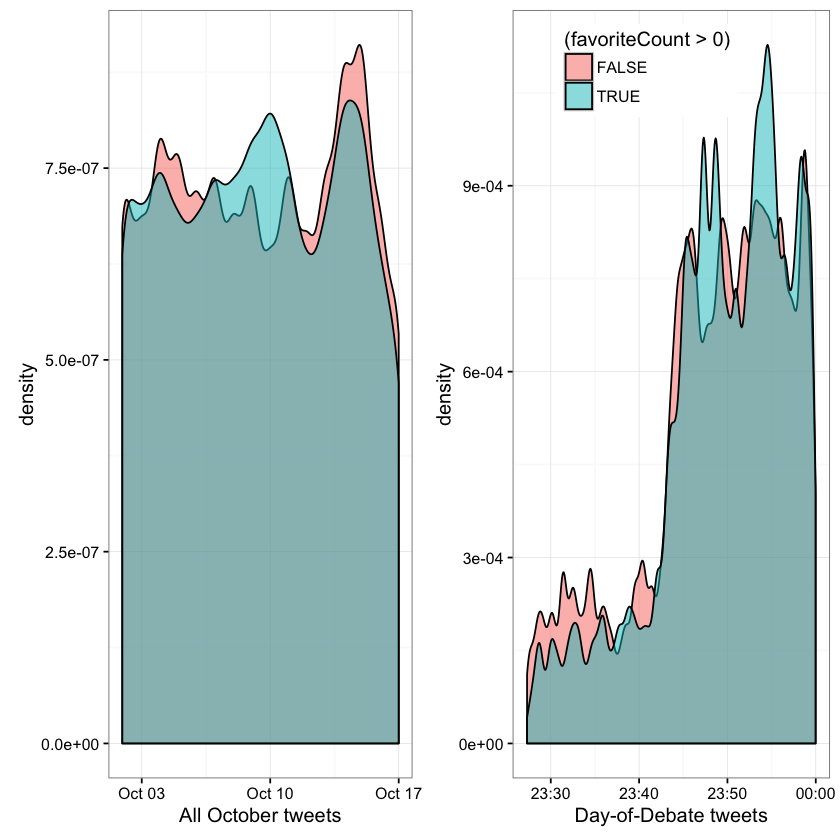

In [16]:


# Plot for pattern of favorited tweets
# combined.tweets 
invisible(dev.off())
quartz()
DateWisePlot = ggplot(combined.tweets, aes(created)) + 
  geom_density(aes(fill = (favoriteCount > 0)), alpha = .5) +
  scale_fill_discrete(guide = 'none') +
  xlab('All October tweets')
#plot(DateWisePlot)

# Zoom on debate day
DebateDayPlot = ggplot(dayOfDebate, aes(created)) + 
  geom_density(aes(fill = (favoriteCount > 0)), adjust = .25, alpha = .5) +
  theme(legend.justification = c(1, 1), legend.position = c(0.75, 1)) +
  xlab('Day-of-Debate tweets')
#plot(timeDistDayOf)
cowplot::plot_grid(DateWisePlot, DebateDayPlot)

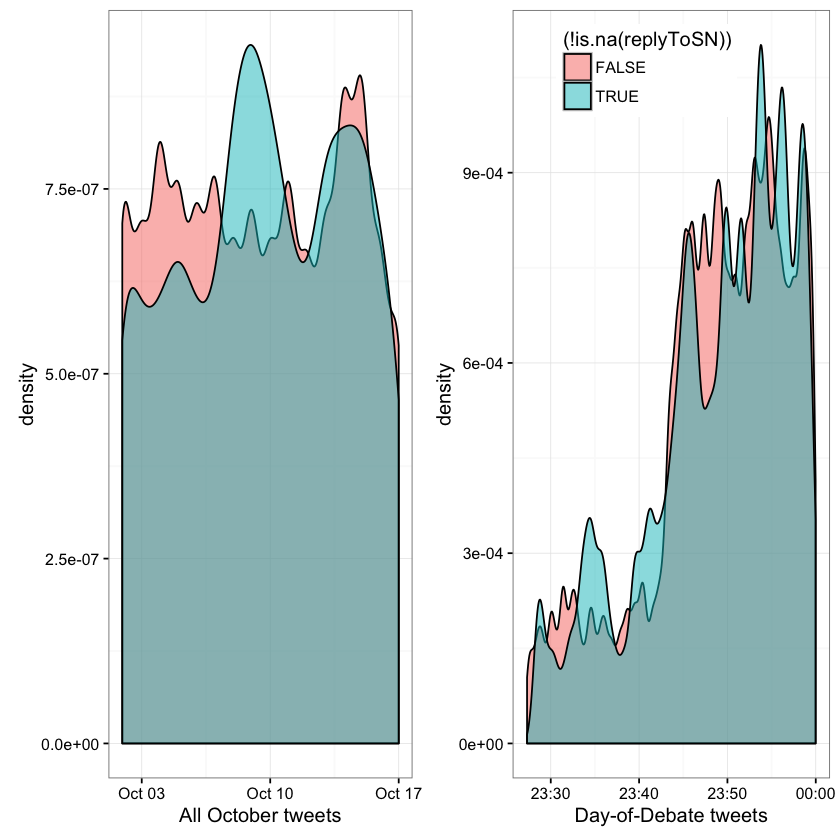

In [17]:
# Plot for pattern of replied tweets
invisible(dev.off())
quartz()
DateWisePlot = ggplot(combined.tweets, aes(created)) + 
  geom_density(aes(fill = (!is.na(replyToSN))), alpha = .5) +
  scale_fill_discrete(guide = 'none') +
  xlab('All October tweets')
#plot(DateWisePlot)

# Zoom on debate day
DebateDayPlot = ggplot(dayOfDebate, aes(created)) + 
  geom_density(aes(fill = (!is.na(replyToSN))), adjust = .25, alpha = .5) +
  theme(legend.justification = c(1, 1), legend.position = c(0.75, 1)) +
  xlab('Day-of-Debate tweets')
#plot(timeDistDayOf)
cowplot::plot_grid(DateWisePlot, DebateDayPlot)

### More Trump tweets than Clinton tweets overall


   Donald Trump Hillary Clinton 
          30479           27653 

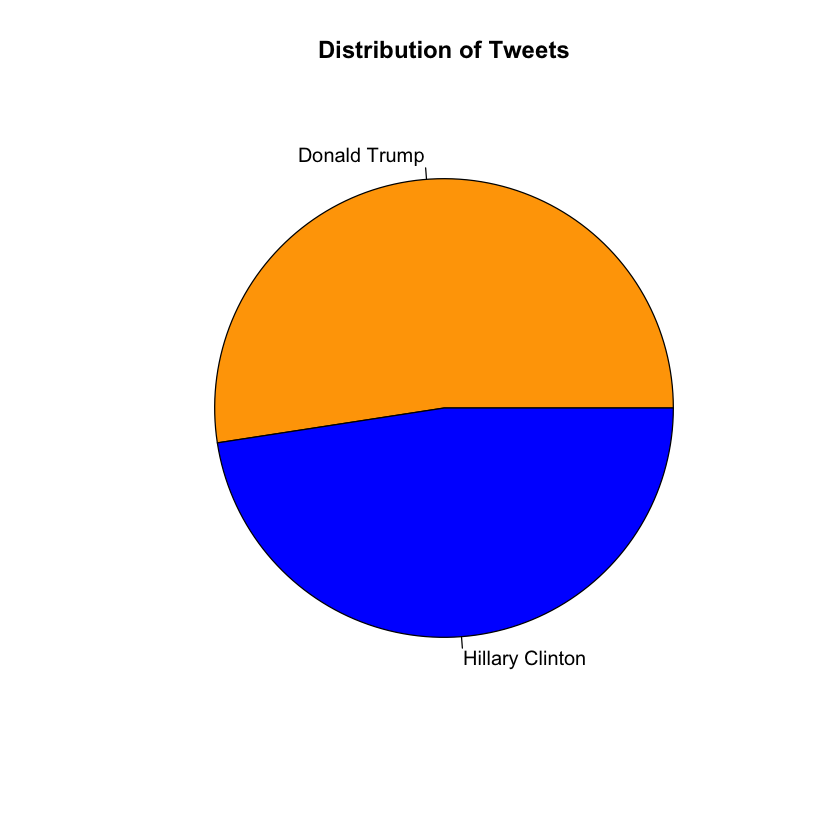

In [50]:
# Group number of tweets by presidential candidate
table(combined.tweets$search.str)
# Donald Trump Hillary Clinton 
# 20792           18780 


# Create a Pie chart to show the above distribution of tweets
invisible(dev.off())
quartz()
pie(table(combined.tweets$search.str), col = c("orange", "blue"), 
    main = "Distribution of Tweets")

                 
                     1    2    3    4    5    6    7    8    9   10   11   12
  Donald Trump    1907 1682 2243 1927 1818 1968 1389 1855 1984 2000 2019 1643
  Hillary Clinton 1982 1617 1712 1755 1639 1764 2045 1918 1421 1794 1135 1893
                 
                    13   14   15   16
  Donald Trump    2459 2346 1506 1733
  Hillary Clinton 1892 2160 1781 1145

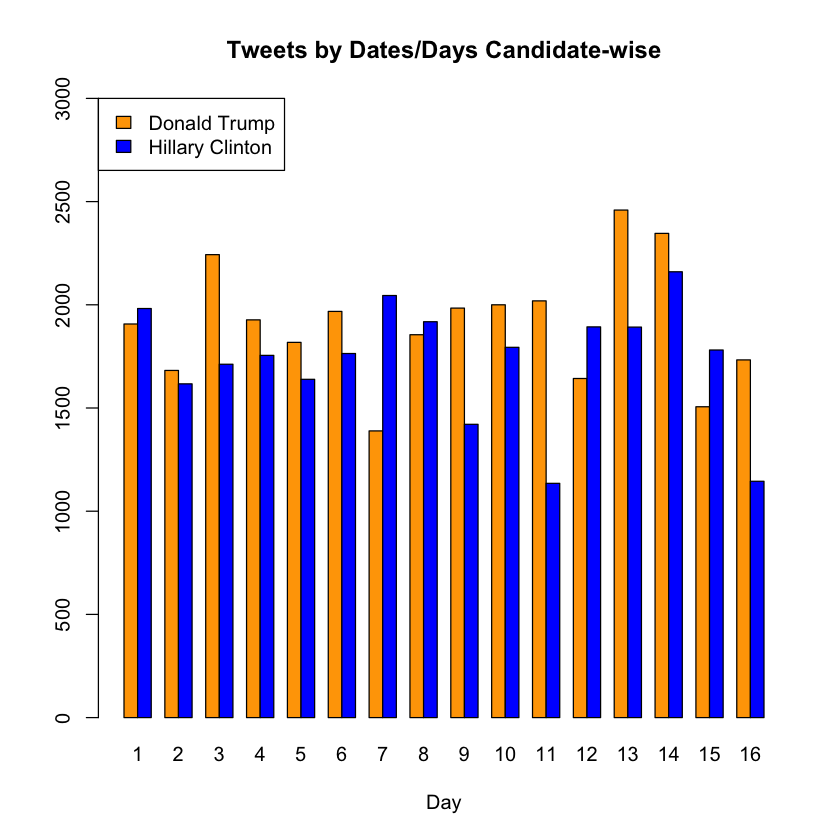

In [51]:
# Group number of tweets by dates/days
table(combined.tweets$search.str, day(combined.tweets$dateonly))
#                    1    2    3    4    5    6    7    8    9   10   11
# Donald Trump    1907 1682 2243 1927 1818 1968 1389 1855 1984 2000 2019
# Hillary Clinton 1982 1617 1712 1755 1639 1764 2045 1917 1420 1794 1135

# Visualize this group of data using a Barplot
invisible(dev.off())
quartz()
barplot(table(combined.tweets$search.str, day(combined.tweets$dateonly)),
        main = "Tweets by Dates/Days Candidate-wise",
        xlab = "Day", col = c("orange", "blue"), ylim = c(0, 3000),
        legend = rownames(table(combined.tweets$search.str, day(combined.tweets$dateonly))),
        args.legend = list(x="topleft"), 
        beside=TRUE)

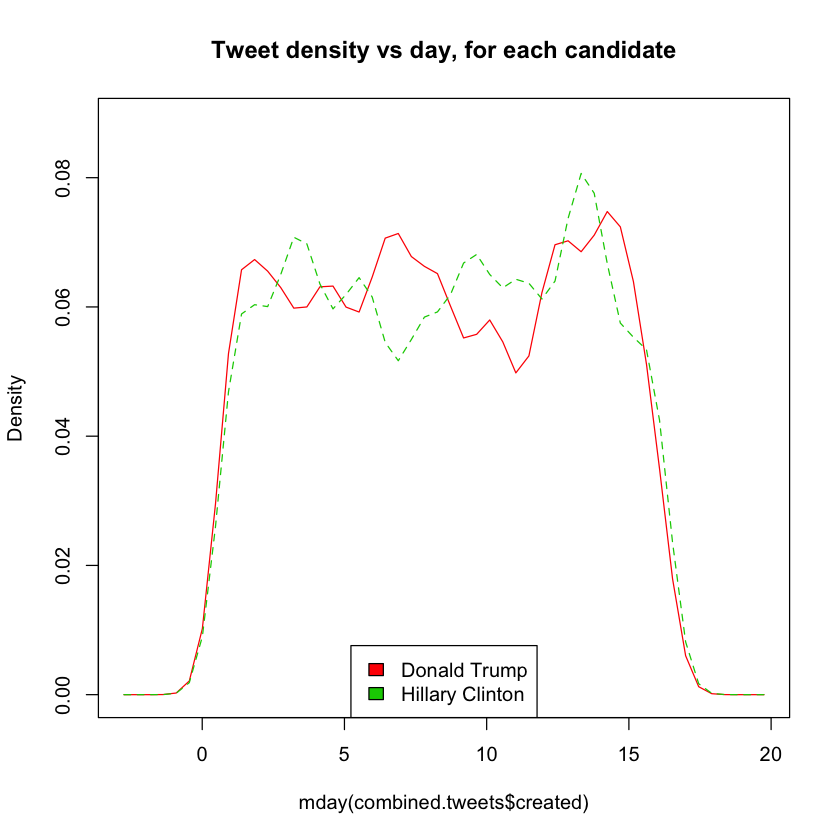

In [20]:
# library(sm)
#
invisible(dev.off())
quartz()
sm.density.compare(mday(combined.tweets$created),
                   combined.tweets$search.str=="Donald Trump")
legend("bottom", levels(as.factor(combined.tweets$search.str)), 
       fill=2+(0:nlevels(as.factor(combined.tweets$search.str))))
title(main="Tweet density vs day, for each candidate")
#axis(side = 1, at = c(0,5,10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90))
#axis(side = 2, at = c(0,0.01,0.02,0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 1))

## Clinton tweets outnumber Trump tweets from Oct. 9th through Oct. 16th

Compare the density of tweets between 9th and the rest of the October days, and also between Trump and Clinton

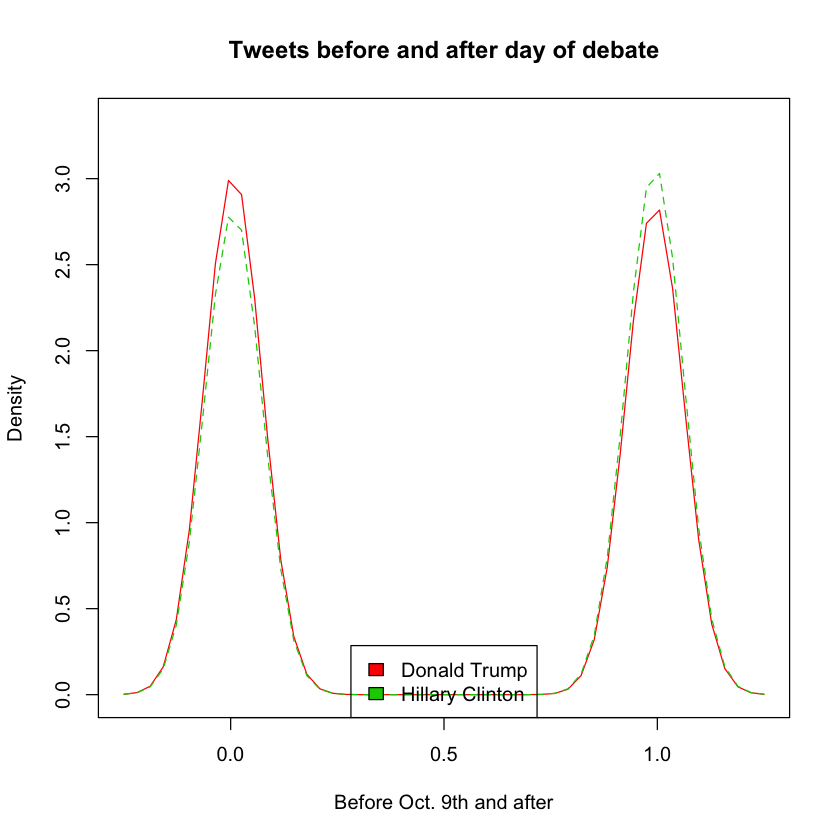

In [21]:
# library(sm)
#
invisible(dev.off())
quartz()
sm.density.compare((mday(combined.tweets$created) <9 ) ,
                   combined.tweets$search.str == "Hillary Clinton", xlab="Before Oct. 9th and after")
legend("bottom", levels(as.factor(combined.tweets$search.str)), 
       fill=2+(0:nlevels(as.factor(combined.tweets$search.str))))
title(main="Tweets before and after day of debate")
#axis(side = 2, at = c("Oct. 1st Oct. 9th", "Oct. 9 through Oct. 16"))


The chart shows that for all days before the 9th October, the density of "Donald Trump" tweets exceeded those of "Hillary Clinton", but on and after 9th i.e. from the 9th to the 11th (both dates inclusive), it was just the reverse. The reason is evident from the the previous barplot where a huge upward swing for the "Hillary Clinton" tweets is seen on the 10th.

## Next steps
-Sort tweets into positive and negative
-Create wordclouds of two groups  
-Create web app interface for others to explore    